## Import

In [4]:
import pandas as pd
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
import supervision as sv
import numpy as np 

In [15]:
xyxy = [964.1109,454.03424,1038.7888,649.592]
n = len(xyxy) // 4
xyxy = np.array(xyxy).reshape(n, 4)
class_id = [81]
class_id = np.array(class_id).reshape(n, )
xyxy

array([[ 964.1109 ,  454.03424, 1038.7888 ,  649.592  ]])

In [16]:
detection = sv.Detections(xyxy, class_id=class_id, tracker_id=None)

In [17]:
detection

Detections(xyxy=array([[ 964.1109 ,  454.03424, 1038.7888 ,  649.592  ]]), mask=None, confidence=None, class_id=array([81]), tracker_id=None, data={})

In [5]:
%ls
%cd CSVSink/
%ls

 El volumen de la unidad X es Crucial NVME
 El n�mero de serie del volumen es: A4DF-210D

 Directorio de x:\Life\TFG\Coding\ObjectDetector\CSVSink

28/05/2024  12:28    <DIR>          .
28/05/2024  12:39    <DIR>          ..
15/05/2024  17:29         1.244.258 Visual_toolbox.ipynb
               1 archivos      1.244.258 bytes
               2 dirs  461.547.749.376 bytes libres
[WinError 2] El sistema no puede encontrar el archivo especificado: 'CSVSink/'
x:\Life\TFG\Coding\ObjectDetector\CSVSink


x:\Life\TFG\Coding\venvs\YOLOv8\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


 El volumen de la unidad X es Crucial NVME
 El n�mero de serie del volumen es: A4DF-210D

 Directorio de x:\Life\TFG\Coding\ObjectDetector\CSVSink

28/05/2024  12:28    <DIR>          .
28/05/2024  12:39    <DIR>          ..
15/05/2024  17:29         1.244.258 Visual_toolbox.ipynb
               1 archivos      1.244.258 bytes
               2 dirs  461.547.749.376 bytes libres


## Load CSV

In [6]:


def load_csv(filename):
    FILE_PATH = Path("../../ObjectDetector/data/"+filename)
    if not FILE_PATH.exists():
        raise Exception(f"The path '{FILE_PATH.as_posix()}' is not recognized.")

    # Read the CSV file into a DataFrame
    df = pd.read_csv(FILE_PATH)
    return df

# Replace with the actual path to the CSV file
filename = "VID_20220426_161600\objects_detections_unprocessed.csv"
df = load_csv(filename)
print(df.head())

      x_min      y_min       x_max      y_max  class_id  confidence  \
0  964.1109  454.03424  1038.78880  649.59200         0    0.772512   
1  454.4166  508.97983   482.57968  596.49805         0    0.631614   
2  514.1022  509.53210   540.20090  588.09260         0    0.611843   
3  590.4860  508.73900   616.63086  581.14703         0    0.538745   
4  940.9242  446.74970  1016.77910  644.56400         0    0.793493   

   tracker_id  Frame class_name  
0           1      0     person  
1           2      0     person  
2           3      0     person  
3           4      0     person  
4           1      1     person  


## Obtain unique tracker ID's

In [7]:
def unique_ID_dict(dataframe, class_ids=None):
    """
    Computes unique tracker IDs, their appearances and corresponding class IDs in the DataFrame.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        clas_ids (list, optional): List of class IDs to filter by (default is None)

    Returns:
        pd.DataFrame: DataFrame with unique tracker IDs, appearances and class IDs.
    """
    if class_ids:
        filtered_df = dataframe[dataframe["class_id"].isin(class_ids)]
    else:
        filtered_df = dataframe

    unique_tracker_ids, counts = np.unique(filtered_df["tracker_id"], return_counts=True)

    # Create a DataFrame
    tracker_id_counts = pd.DataFrame({
            "Unique IDs": unique_tracker_ids,
            "Appearances": counts,
            "Class IDs": filtered_df.groupby("tracker_id")["class_id"].first().values
            })
    return tracker_id_counts

# Example
class_ids_to_filter = [0, 1, 3]
tracker_ID_df = unique_ID_dict(df, class_ids_to_filter)

print(tracker_ID_df)

    Unique IDs  Appearances  Class IDs
0            1           27          0
1            2           64          0
2            3           11          0
3            4           76          0
4           18           10          0
5           25           17          1
6           39            2          1
7           40          195          0
8           55           91          0
9           58          296          0
10          71            6          0
11          72            1          0
12          78           17          0
13          80            1          0
14          81            1          0
15          87            1          0
16          89            2          0
17          94            1          0
18         125            4          0
19         134            6          0
20         137            1          0
21         139            6          0
22         141            2          0
23         155            2          0
24         157           

In [8]:
sorted_df = tracker_ID_df.sort_values(by="Appearances")
print(sorted_df)

    Unique IDs  Appearances  Class IDs
14          81            1          0
31         197            1          0
26         170            1          0
36         229            1          0
20         137            1          0
17          94            1          0
15          87            1          0
28         177            1          0
11          72            1          0
13          80            1          0
24         157            2          0
22         141            2          0
16          89            2          0
23         155            2          0
6           39            2          1
43         274            2          0
18         125            4          0
10          71            6          0
19         134            6          0
21         139            6          0
41         244            9          1
4           18           10          0
40         240           11          0
2            3           11          0
34         214           

In [9]:
def get_ids_by_appearances(df, num_appearances):
    # Filter rows where Appearances are less than or equal to the specified value
    filtered_df = df[df["Appearances"] >= num_appearances]

    # Get the unique IDs from the filtered DataFrame
    unique_ids = filtered_df["Unique IDs"].tolist()
    
    return unique_ids

appearances = 3
result_ids = get_ids_by_appearances(tracker_ID_df, appearances)
print(f"Unique IDs with with more than {appearances} appearances: {result_ids}")

Unique IDs with with more than 3 appearances: [1, 2, 3, 4, 18, 25, 40, 55, 58, 71, 78, 125, 134, 139, 165, 172, 193, 194, 205, 208, 214, 219, 235, 236, 239, 240, 244, 254, 280, 290, 304, 319]


In [10]:
tracker_ID_df["Unique IDs"].tolist()

[1,
 2,
 3,
 4,
 18,
 25,
 39,
 40,
 55,
 58,
 71,
 72,
 78,
 80,
 81,
 87,
 89,
 94,
 125,
 134,
 137,
 139,
 141,
 155,
 157,
 165,
 170,
 172,
 177,
 193,
 194,
 197,
 205,
 208,
 214,
 219,
 229,
 235,
 236,
 239,
 240,
 244,
 254,
 274,
 280,
 290,
 304,
 319]

## Filter data


In [11]:
def filter_data_by_ids(dataframe, id_list):
    """
    Filter the DataFrame to inlcude only rows with specified IDs.
    
    Args:
        dataframe (pd.Dataframe): The input DataFrame.
        id_list (list): List of IDs to filter by.
        
    Returns:
        pd.Dataframe: Filtered DataFrame containing rows with specified IDs.
    """
    filtered_df = dataframe[dataframe["tracker_id"].isin(id_list)]
    return filtered_df

# Example
my_ids = [11, 12, 21]
filter_data = filter_data_by_ids(df, my_ids)
print(filter_data)

Empty DataFrame
Columns: [x_min, y_min, x_max, y_max, class_id, confidence, tracker_id, Frame, class_name]
Index: []


## Combine detections

In [12]:
def combine_with_person(dataframe):
    """
    Combines person and bike/motorbike detections based on intersection of bounding boxes.

    Args:
        dataframe (pd.DataFrame): Input DataFrame containing bounding box information.

    Returns:
        pd.DataFrame: New DataFrame with combined detections.

    """

    combined_detections = []

    for frame_number, frame_group in dataframe.groupby("Frame"):
        # Get bounding boxes for persons and bikes/motorbikes
        person_boxes = frame_group[frame_group["class_id"] == 0][["x_min", "y_min", "x_max", "y_max","class_id","confidence","tracker_id","Frame","class_name"]]
        bike_boxes = frame_group[frame_group["class_id"].isin([1,3])][["x_min", "y_min", "x_max", "y_max", "class_id","confidence","tracker_id","Frame","class_name"]]
        if frame_number == 155: 
            print()
        # Compute intersection between person and bike/motorbike bounding boxes
        for _, person_box in person_boxes.iterrows():
            for _, bike_box in bike_boxes.iterrows():
                x_min = max(person_box["x_min"], bike_box["x_min"])
                y_min = max(person_box["y_min"], bike_box["y_min"])
                x_max = max(person_box["x_max"], bike_box["x_max"])
                y_max = max(person_box["y_max"], bike_box["y_max"])
                person_center = person_box["x_min"] + (person_box["x_max"] - person_box["x_min"])/2
                bike_area = (bike_box["x_max"]-bike_box["x_min"])* (bike_box["y_max"]-bike_box["y_min"])
                person_area = (person_box["x_max"]-person_box["x_min"])* (person_box["y_max"]-person_box["y_min"])
                if (bike_box["x_min"] < person_center < bike_box["x_max"] and person_box["y_max"] > bike_box["y_min"] 
                    and 0.5 < person_area/bike_area < 3 ):
                    print(f"Bike area: {bike_area}")
                    print(f"Person area: {person_area}")
                    # Intersection exists, create a new combined detection
                    combined_detections.append({
                        "x_min": min(person_box["x_min"], bike_box["x_min"]),
                        "y_min": min(person_box["y_min"], bike_box["y_min"]),
                        "x_max": max(person_box["x_max"], bike_box["x_max"]),
                        "y_max": max(person_box["y_max"], bike_box["y_max"]),
                        "class_id": 81,
                        "class_name": "rider",
                        "confidence": person_box["confidence"],
                        "tracker_id": [person_box["tracker_id"], bike_box["tracker_id"]],
                        "Frame": frame_number
                    })
        
    combined_df = pd.DataFrame(combined_detections)
        
    return combined_df
    
new_combined_detections = combine_with_person(df)
#print(new_combined_detections)

Bike area: 26516.73735943201
Person area: 55957.0769796599
Bike area: 2512.973436760497
Person area: 5961.242251282502
Bike area: 2407.0980972845023
Person area: 5902.973643938797
Bike area: 4501.621717142399
Person area: 9550.194696768001
Bike area: 5455.964527005996
Person area: 10554.7099602178
Bike area: 5347.150204697999
Person area: 10848.258698950403
Bike area: 4407.942980288005
Person area: 11752.553325543
Bike area: 5099.491020732597
Person area: 12381.281904486397
Bike area: 8285.398248537997
Person area: 15142.836723349003
Bike area: 8848.655002080004
Person area: 15396.882160305
Bike area: 10198.392652724398
Person area: 16453.181694862404
Bike area: 10572.918234277498
Person area: 18577.956962412503
Bike area: 8313.740877744001
Person area: 20493.9333631518
Bike area: 11563.0611803775
Person area: 21240.6456788284
Bike area: 11937.589882379998
Person area: 23870.434096928006
Bike area: 11799.869496726997
Person area: 25599.94333651449
Bike area: 12878.943765596994
Person a

In [13]:
def combine_person_and_bike(dataframe):
    """
    Combines person and bike/motorbike detections based on intersection of bounding boxes.

    Args:
        dataframe (pd.DataFrame): Input DataFrame containing bounding box information.

    Returns:
        pd.DataFrame: New DataFrame with combined detections.
    """

    combined_detections = []
    

    for frame_number, frame_group in dataframe.groupby("Frame"):
        # Get bounding boxes for persons and bikes/motorbikes
        person_boxes = frame_group[frame_group["class_id"] == 0][["x_min", "y_min", "x_max", "y_max", "class_id", "confidence", "tracker_id", "Frame", "class_name"]]
        bike_boxes = frame_group[frame_group["class_id"].isin([1, 3])][["x_min", "y_min", "x_max", "y_max", "class_id", "confidence", "tracker_id", "Frame", "class_name"]]

        person_added = set()  # Keep track of person boxes already added in the current frame
        bike_added = set()    # Keep track of bike boxes already added in the current frame
        # Compute intersection between person and bike/motorbike bounding boxes
        for _, person_box in person_boxes.iterrows():
            
            for _, bike_box in bike_boxes.iterrows():

                x_min = max(person_box["x_min"], bike_box["x_min"])
                y_min = max(person_box["y_min"], bike_box["y_min"])
                x_max = max(person_box["x_max"], bike_box["x_max"])
                y_max = max(person_box["y_max"], bike_box["y_max"])
                person_center = person_box["x_min"] + (person_box["x_max"] - person_box["x_min"]) / 2
                bike_area = (bike_box["x_max"] - bike_box["x_min"]) * (bike_box["y_max"] - bike_box["y_min"])
                person_area = (person_box["x_max"] - person_box["x_min"]) * (person_box["y_max"] - person_box["y_min"])

                if (bike_box["x_min"] < person_center < bike_box["x_max"] and person_box["y_max"] > bike_box["y_min"]
                        and 0.5 < person_area / bike_area < 3):
                    # Intersection exists, create a new combined detection
                    combined_detections.append({
                        "x_min": min(person_box["x_min"], bike_box["x_min"]),
                        "y_min": min(person_box["y_min"], bike_box["y_min"]),
                        "x_max": max(person_box["x_max"], bike_box["x_max"]),
                        "y_max": max(person_box["y_max"], bike_box["y_max"]),
                        "class_id": 81,
                        "class_name": "rider",
                        "confidence": person_box["confidence"],
                        "tracker_id": [person_box["tracker_id"], bike_box["tracker_id"]],
                        "Frame": frame_number
                    })
                    person_added.add(person_box["tracker_id"])
                    bike_added.add(bike_box["tracker_id"])
                    break
        
        # Add the boxes for the current frame that have not been added        
        for _, person_box in person_boxes.iterrows():
            if person_box["tracker_id"] not in person_added:
                combined_detections.append({
                    "x_min": person_box["x_min"],
                    "y_min": person_box["y_min"],
                    "x_max": person_box["x_max"],
                    "y_max": person_box["y_max"],
                    "class_id": person_box["class_id"],
                    "class_name": person_box["class_name"],
                    "confidence": person_box["confidence"],
                    "tracker_id": person_box["tracker_id"],
                    "Frame": frame_number
                })
        for _, bike_box in bike_boxes.iterrows():
            if bike_box["tracker_id"] not in bike_added:
                combined_detections.append({
                    "x_min": bike_box["x_min"],
                    "y_min": bike_box["y_min"],
                    "x_max": bike_box["x_max"],
                    "y_max": bike_box["y_max"],
                    "class_id": bike_box["class_id"],
                    "class_name": bike_box["class_name"],
                    "confidence": bike_box["confidence"],
                    "tracker_id": bike_box["tracker_id"],
                    "Frame": frame_number
                })
        
    combined_df = pd.DataFrame(combined_detections)

    return combined_df

new_combined_detections = combine_person_and_bike(df)


In [14]:
def combine_detections(dataframe):
    """
    Combines detections with the same tracker ID within each frame.

    Args:
        dataframe (pd.DataFrame): Input DataFrame containing bounding box information.

    Returns:
        pd.DataFrame: New DataFrame with combined detections.
    """
    combined_detections = []

    for  frame_number, frame_group in dataframe.groupby("Frame"):
        # Group detections by tracker ID
        grouped_by_tracker = frame_group.groupby("tracker_id")

        for _, group in grouped_by_tracker:
            if len(group) > 1:
                # Compute the outer bounding box for the group
                x_min = group["x_min"].min()
                y_min = group["y_min"].min()
                x_max = group["x_max"].max()
                y_max = group["y_max"].max()

                # Combine detections with the same tracker ID
                combined_detection = group.iloc[0].copy()
                combined_detection["x_min"] = x_min
                combined_detection["y_min"] = y_min
                combined_detection["x_max"] = x_max
                combined_detection["y_max"] = y_max
                combined_detection["confidence"] = group["confidence"].max()
                combined_detections.append(combined_detection)
            else:
                # Keep single detection as is
                combined_detections.append(group.iloc[0])
                
    # Create a new DataFrame with combined detections
    combined_df = pd.DataFrame(combined_detections)
    return combined_df

In [15]:
def group_riders_trackers_id(dataframe):
    """
    Groups rider tracker IDs.

    Args: 
        dataframe (pd.DataFrame)

    Returns:
        list[list[int]]: List of lists, where each inner list represents a group of rider trackrs IDs
    """

    # Initialize an empty dictionary to store rider trackr IDs and corresponding group
    rider_groups = {}

    for _, row in dataframe.iterrows():
        if row["class_name"] == "rider":
            tracker_ids = row["tracker_id"]

            # Use the first tracker ID as the group identifier
            group_identifier = tracker_ids[0]

            # Check if the group identifier is already in any group
            in_group = False
            for group in rider_groups.values():
                if group_identifier in group:
                    in_group = True
                    break

            if not in_group:
                # Create a new group for the tracker ID
                rider_groups[group_identifier] = set(tracker_ids)

                # Search for other rider detections with overlapping tracker IDs
                for _, other_row in dataframe.iterrows():
                    if other_row["class_name"] == "rider":
                        other_tracker_ids = other_row["tracker_id"]
                        for track_id in other_tracker_ids:
                            if track_id  in rider_groups[group_identifier]:
                                # Add the other tracker IDs to the same group
                                rider_groups[group_identifier].update(other_tracker_ids)
                                break
    return rider_groups





In [16]:
grouped_list = group_riders_trackers_id(new_combined_detections)
print(grouped_list)

{2: {2, 39}, 172: {193, 172}, 254: {290, 254}}


In [17]:
print(new_combined_detections)

           x_min        y_min        x_max        y_max  class_id class_name  \
0      964.11090    454.03424   1038.78880    649.59200         0     person   
1      454.41660    508.97983    482.57968    596.49805         0     person   
2      514.10220    509.53210    540.20090    588.09260         0     person   
3      590.48600    508.73900    616.63086    581.14703         0     person   
4      940.92420    446.74970   1016.77910    644.56400         0     person   
...          ...          ...          ...          ...       ...        ...   
1642   438.33722    437.36896    533.97815    681.16130         0     person   
1643   581.67220    407.07712    669.28160    671.18866         0     person   
1644   422.82858    431.42148    520.83410    682.79260         0     person   
1645   569.28094    398.06378    656.88403    663.85535         0     person   
1646  1474.97950 -62235.59000  11695.23000 -58177.55500         0     person   

      confidence tracker_id  Frame  
0 

In [18]:
new_combined_detections = combine_person_and_bike(df)

In [19]:
def propagate_detection(dataframe):
    rider_groups = group_riders_trackers_id(dataframe)

    new_rows = []

    for _, row in dataframe.iterrows():
        if row["class_name"] == "rider":
            tracker_ids = row["tracker_id"]
            for group_id, group_trackers in rider_groups.items():
                if any(track_id in group_trackers for track_id in tracker_ids):
                    # Update tracker IDs to the group identifier
                    row["tracker_id"] = group_id
                    row["class_id"] = 81
                    row["class_name"] = "rider"
                    break
        elif row["class_name"] in [ "person", "bycicle", "motorcycle"]:
            track_id = row["tracker_id"]
            for group_id, group_trackers in rider_groups.items():
                if track_id in group_trackers:
                    row["tracker_id"] = group_id
                    row["class_id"] = 81
                    row["class_name"] = "rider"
                    break
        new_rows.append(row)

    updated_detections = pd.DataFrame(new_rows)
    return updated_detections    

updated_detections = propagate_detection(new_combined_detections)


In [20]:
class_ids_to_filter = [81]
tracker_ID_df = unique_ID_dict(updated_detections, class_ids_to_filter)

print(tracker_ID_df)

   Unique IDs  Appearances  Class IDs
0           2           65         81
1         172           75         81
2         254          260         81


In [21]:
def compute_class_counts(df):
    """
    Computes the number of times each unique tracker_id has for each class_id.

    Args:
        df (pd.DataFrame): Input DataFrame with columns "tracker_id" and "class_id".

    Returns:
        pd.DataFrame: DataFrame with columns "tracker_id", "class_id", and "count".
    """
    grouped = df.groupby(["tracker_id", "class_id"]).size().reset_index(name="count")
    return grouped

# Example usage:
data = {
    "tracker_id": [1, 1, 2, 2, 3, 3],
    "class_id": ["car", "bus", "car", "truck", "bus", "car"]
}
def get_most_common_class(df):
    """
    Generates a dictionary where keys are tracker IDs and values are the class IDs
    with the highest count.

    Args:
        df (pd.DataFrame): Input DataFrame with columns "tracker_id" and "class_id".

    Returns:
        dict: Dictionary mapping tracker IDs to most common class IDs.
    """
    class_counts = compute_class_counts(df)
    most_common_classes = class_counts.groupby("tracker_id")["class_id"].max().to_dict()
    return most_common_classes

def assign_class_to_tracker(df):
    """
    Assigns the most common class ID to each tracker ID in the original DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame with columns "tracker_id" and "class_id".

    Returns:
        pd.DataFrame: DataFrame with an additional column "most_common_class_id".
    """

    coco_categories = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
    class_mapping = {i: coco_categories[i] for i in range(len(coco_categories))}

    most_common_dict = get_most_common_class(df)
    df["class_id"] = df["tracker_id"].map(most_common_dict)
    df["class_name"] = df["class_id"].map(class_mapping)
    return df

# Example usage:
data = {
    "tracker_id": [1, 1, 2, 2, 3, 3],
    "class_id": ["car", "bus", "car", "truck", "bus", "car"]
}


result = compute_class_counts(df)
print(result)

result_dict = get_most_common_class(df)
print(result_dict)

result_df = assign_class_to_tracker(df)
print(result_df.head())

    tracker_id  class_id  count
0            1         0     27
1            2         0     64
2            3         0     11
3            4         0     76
4            5         2      1
5           18         0     10
6           25         1     17
7           39         0      1
8           39         1      1
9           40         0    195
10          53         2      5
11          55         0     91
12          58         0    296
13          67         2      6
14          71         0      6
15          72         0      1
16          78         0     17
17          80         0      1
18          81         0      1
19          87         0      1
20          89         0      2
21          94         0      1
22         125         0      4
23         134         0      6
24         137         0      1
25         139         0      6
26         141         0      2
27         155         0      2
28         157         0      2
29         165         0     29
30      

## Visualize data

In [22]:
def display_bounding_boxes (dataframe, video_file_path):
    """
    Generator function to display boundingg boxes and labels for each frame.
    
    Args:
        dataframe (pd.DataFrame): DataFrame containing bounding box coordinates.
        video_file_path (str): Path to the video file.
        
    Yields:
    """
    cap = cv2.VideoCapture(video_file_path)
    if not cap.isOpened():
        raise ValueError(f"Error opening video file: '{video_file_path}'.")
    
    # Dictionary for unique colors for each track ID
    track_colors = {}

    frame = None
    last_frame_number = -1
    for _, row in dataframe.iterrows():
        frame_number = row["Frame"]
        
        if last_frame_number != frame_number or last_frame_number==-1:
            if frame is not None:
                yield frame, last_frame_number
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
            ret, frame = cap.read()
            last_frame_number = frame_number

        if not ret:
            break

        x_min, y_min, x_max, y_max = int(row["x_min"]), int(row["y_min"]), int(row["x_max"]), int(row["y_max"])
        class_id = row["class_id"]
        class_name = row["class_name"]
        track_id = row["tracker_id"]

        # Assign a unique color to each track ID
        if track_id not in track_colors:
            track_colors[track_id] = np.random.randint(0, 256, size=3).tolist()

        # Draw bounding box
        color = tuple(track_colors[track_id])
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), color, 2)

        # Add label
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, f"c:{class_id} id:{track_id}", (x_min, y_min - 20), font, 0.8, color, 2, cv2.LINE_AA)
        cv2.putText(frame, f"n:{class_name}", (x_min, y_min - 5), font, 0.6, color, 2, cv2.LINE_AA)
        

    cap.release()

In [23]:
# Example
video_path = "X:\Life\TFG\Coding\Testing\Videos\BikeBi\VID_20220427_143651.mp4"
filtered_data = new_combined_detections
frame_iterator = iter(display_bounding_boxes(filtered_data, video_path))


0


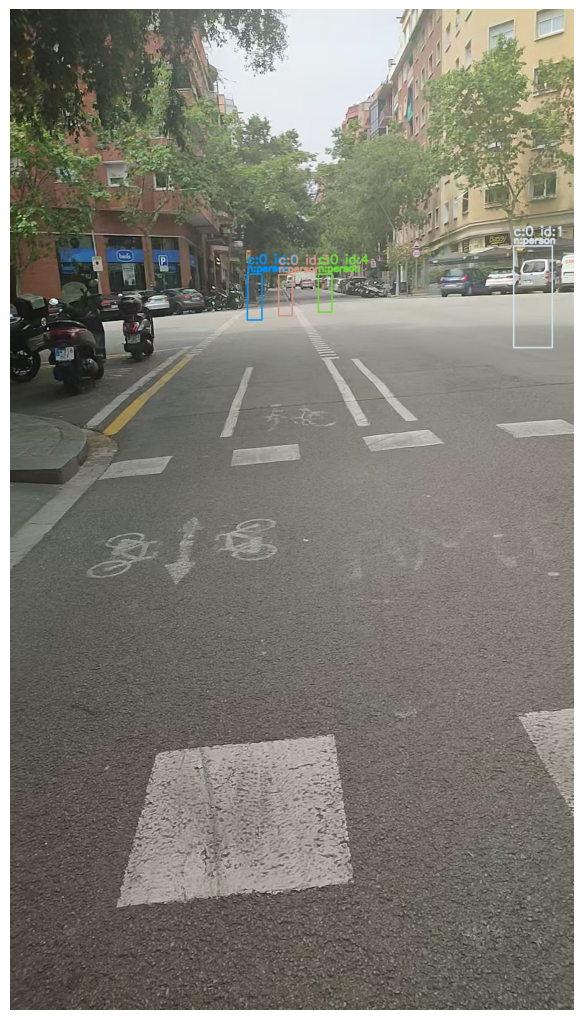

In [24]:
frame_with_bboxes, frame_number = next(frame_iterator)
print(frame_number)
plt.figure(figsize=(20,13))
plt.imshow(cv2.cvtColor(frame_with_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
for frame_with_bboxes, frame_number in display_bounding_boxes(filtered_data, video_path):
    print(frame_number)
    plt.imshow(cv2.cvtColor(frame_with_bboxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Things that can be done

In [26]:
csvfile = "VID_20220426_161600\objects_detections_unprocessed.csv"
videofile = "X:\Life\TFG\Coding\Testing\Videos\BikeBi\VID_20220426_161600.mp4"

# Read CSV file
df = load_csv(filename)

# Obtain the unique IDs
tracker_ID_df = unique_ID_dict(df)

#df = assign_class_to_tracker(df)

# Maintain only the track IDs that appear at least
appearances = 1
result_ids = get_ids_by_appearances(tracker_ID_df, appearances)
filter_data = filter_data_by_ids(df, result_ids)

# Combine persons with bikes and motorcycles
combined_df = combine_person_and_bike(filter_data)
 



In [27]:
# Obtain a dictionary of groups of id
grouped_list = group_riders_trackers_id(combined_df)
print(grouped_list)
updated_detections = propagate_detection(combined_df)
updated_detections = combine_detections(updated_detections)

{2: {2, 39}, 172: {193, 172}, 254: {290, 254}}


In [41]:
# Create the generator for visualization
frame_iterator = iter(display_bounding_boxes(updated_detections, videofile))

11


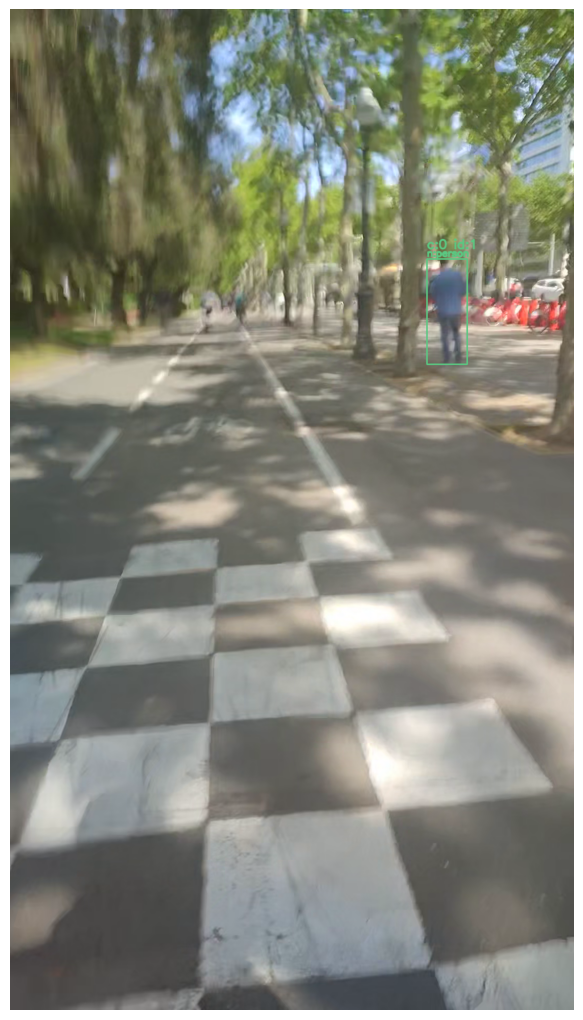

In [40]:
# Visualize it
frame_with_bboxes, frame_number = next(frame_iterator)
print(frame_number)
plt.figure(figsize=(20,13))
plt.imshow(cv2.cvtColor(frame_with_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [42]:
def create_video_from_frames(folder_name, output_string, frame_iterator):
    # Check if the folder exists
    FILE_PATH = Path("../../ObjectDetector/data/"+folder_name)
    if not FILE_PATH.exists():
        raise Exception(f"The path '{FILE_PATH.as_posix()}' is not recognized.")
    
    # Set frame size (width, height)
    frame_size = (1080, 1920)

    # Create a VideoWriter
    output_filename = f"{folder_name}_{output_string}.mp4"
    out = cv2.VideoWriter(FILE_PATH.as_posix()+"/"+output_filename, cv2.VideoWriter_fourcc(*'mp4v'), 30, frame_size)

    for frame_with_bboxes, frame_number in frame_iterator:
        #print(f"Frame shape: {frame_with_bboxes.shape}, dtype: {frame_with_bboxes.dtype}")
        out.write(frame_with_bboxes)
    
    out.release()
    print(f"Video saved as '{output_filename}' at '{FILE_PATH.as_posix()}'")

folder_name = Path(videofile).stem
print(folder_name)
#folder_name = "VID_20220427_16100"
output_string = "riders"
frame_iterator = iter(display_bounding_boxes(updated_detections, videofile))
create_video_from_frames(folder_name, output_string, frame_iterator)

VID_20220426_161600
Video saved as 'VID_20220426_161600_riders.mp4' at '../../ObjectDetector/data/VID_20220426_161600'


# TODO
for each track_ID compute the number of times each class_id is present, update all track_id class_id to the one most used

In [85]:
# Identify why there are repeated detections id the csv
print(updated_detections)


           x_min      y_min       x_max      y_max  class_id  class_name  \
0     204.618710  543.32320   279.22736  674.74770         3  motorcycle   
1     204.618710  543.32320   279.22736  674.74770         3  motorcycle   
2     203.209400  546.67914   276.36282  676.16956         3  motorcycle   
3     203.772130  547.66610   276.40747  676.46520         3  motorcycle   
4      55.986023  528.68760   182.81046  740.42190        81       rider   
...          ...        ...         ...        ...       ...         ...   
3059  934.310670  538.45526  1077.13670  656.27730         3  motorcycle   
3060  115.691795  488.03910   168.97273  636.74304         0      person   
3061  114.300000  487.52530   168.18950  636.25260         0      person   
3062  930.157700  529.67816  1076.56320  680.99270         3  motorcycle   
3063  930.791600  530.60320  1078.02870  680.88416         3  motorcycle   

      confidence  tracker_id  Frame  
0       0.736061           2      0  
1       0.7

In [343]:
def display_bounding_boxes (dataframe, video_file_path):
    """
    Generator function to display boundingg boxes and labels for each frame.
    
    Args:
        dataframe (pd.DataFrame): DataFrame containing bounding box coordinates.
        video_file_path (str): Path to the video file.
        
    Yields:
    """
    cap = cv2.VideoCapture(video_file_path)
    if not cap.isOpened():
        raise ValueError(f"Error opening video file: '{video_file_path}'.")
    
    # Dictionary for unique colors for each track ID
    track_colors = {}

    frame = None
    last_frame_number = -1
    for _, row in dataframe.iterrows():
        frame_number = row["Frame"]
        
        if last_frame_number != frame_number or last_frame_number==-1:
            if frame is not None:
                yield frame, last_frame_number
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
            ret, frame = cap.read()
            last_frame_number = frame_number

        if not ret:
            break

        x_min, y_min, x_max, y_max = int(row["x_min"]), int(row["y_min"]), int(row["x_max"]), int(row["y_max"])
        class_id = row["class_id"]
        class_name = row["class_name"]
        track_id = row["tracker_id"]

        if isinstance(track_id, list):
            track_id = track_id[0]

        # Assign a unique color to each track ID
        if track_id not in track_colors:
            track_colors[track_id] = np.random.randint(0, 256, size=3).tolist()

        # Draw bounding box
        color = tuple(track_colors[track_id])
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), color, 2)

        # Add label
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, f"c:{class_id} id:{track_id}", (x_min, y_min - 20), font, 0.8, color, 2, cv2.LINE_AA)
        cv2.putText(frame, f"n:{class_name}", (x_min, y_min - 5), font, 0.6, color, 2, cv2.LINE_AA)
        

    cap.release()

In [713]:
def compute_class_counts(df):
    """
    Computes the number of times each unique tracker_id has for each class_id.

    Args:
        df (pd.DataFrame): Input DataFrame with columns "tracker_id" and "class_id".

    Returns:
        pd.DataFrame: DataFrame with columns "tracker_id", "class_id", and "count".
    """
    grouped = df.groupby(["tracker_id", "class_id"]).size().reset_index(name="count")
    return grouped

# Example usage:
data = {
    "tracker_id": [1, 1, 2, 2, 3, 3],
    "class_id": ["car", "bus", "car", "truck", "bus", "car"]
}
def get_most_common_class(df):
    """
    Generates a dictionary where keys are tracker IDs and values are the class IDs
    with the highest count.

    Args:
        df (pd.DataFrame): Input DataFrame with columns "tracker_id" and "class_id".

    Returns:
        dict: Dictionary mapping tracker IDs to most common class IDs.
    """
    class_counts = compute_class_counts(df)
    most_common_classes = class_counts.groupby("tracker_id")["class_id"].max().to_dict()
    return most_common_classes

def assign_class_to_tracker(df):
    """
    Assigns the most common class ID to each tracker ID in the original DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame with columns "tracker_id" and "class_id".

    Returns:
        pd.DataFrame: DataFrame with an additional column "most_common_class_id".
    """

    coco_categories = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
    class_mapping = {i: coco_categories[i] for i in range(len(coco_categories))}

    most_common_dict = get_most_common_class(df)
    df["class_id"] = df["tracker_id"].map(most_common_dict)
    df["class_name"] = df["class_id"].map(class_mapping)
    return df

# Example usage:
data = {
    "tracker_id": [1, 1, 2, 2, 3, 3],
    "class_id": ["car", "bus", "car", "truck", "bus", "car"]
}


result = compute_class_counts(df)
print(result)

result_dict = get_most_common_class(df)
print(result_dict)

result_df = assign_class_to_tracker(df)
print(result_df.head())

     tracker_id  class_id  count
0             1         2     33
1             2         2     39
2             3         3     60
3             4         3     63
4             5         2     52
..          ...       ...    ...
100         172         0     37
101         173         1     10
102         175         3     16
103         176         7     25
104         177         0     17

[105 rows x 3 columns]
{1: 2, 2: 2, 3: 3, 4: 3, 5: 2, 6: 3, 7: 2, 8: 2, 9: 2, 10: 3, 11: 3, 12: 3, 13: 2, 15: 7, 16: 3, 17: 3, 20: 2, 21: 2, 22: 2, 25: 2, 26: 2, 27: 2, 29: 2, 30: 2, 33: 2, 34: 7, 37: 2, 38: 2, 39: 2, 40: 2, 42: 2, 47: 2, 48: 2, 50: 3, 51: 3, 52: 3, 54: 3, 55: 3, 57: 3, 59: 3, 60: 3, 61: 3, 62: 3, 63: 3, 65: 3, 69: 3, 70: 3, 71: 3, 74: 0, 78: 3, 79: 3, 81: 3, 82: 2, 83: 2, 84: 7, 85: 2, 86: 2, 87: 2, 88: 2, 90: 2, 92: 2, 94: 2, 95: 2, 97: 0, 100: 2, 101: 0, 104: 2, 106: 0, 107: 0, 108: 0, 109: 7, 110: 2, 115: 2, 116: 2, 118: 2, 123: 2, 125: 2, 127: 7, 128: 2, 129: 3, 133: 2, 135:

## Visualizing persons detections

In [665]:
csvfile = "VID_20220426_161600/objects_detections.csv"
videofile = "X:\Life\TFG\Coding\Testing\Videos\BikeBi\VID_20220426_161600.mp4"

# Read CSV file
df = load_csv(csvfile)

In [666]:
# Create the generator for visualization
frame_iterator = iter(display_bounding_boxes(df, videofile))

18
(1920, 1080, 3)


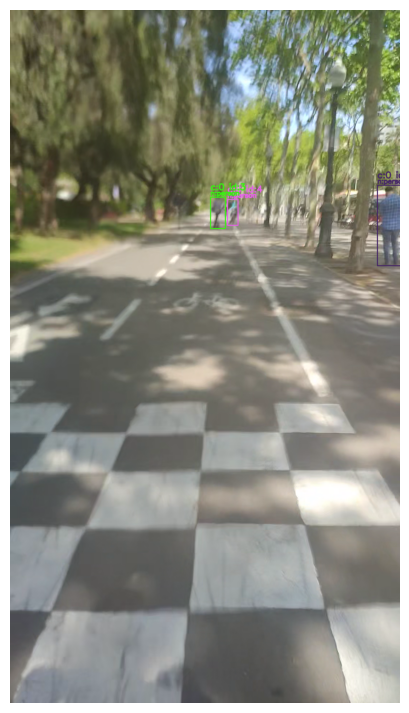

In [685]:
# Visualize it
frame_with_bboxes, frame_number = next(frame_iterator)
print(frame_number)
print(frame_with_bboxes.shape)
plt.figure(figsize=(16,9))
plt.imshow(cv2.cvtColor(frame_with_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Save video from frame_iterator

In [686]:
def create_video_from_frames(folder_name, output_string, frame_iterator):
    # Check if the folder exists
    FILE_PATH = Path("../../ObjectDetector/data/"+folder_name)
    if not FILE_PATH.exists():
        raise Exception(f"The path '{FILE_PATH.as_posix()}' is not recognized.")
    
    # Set frame size (width, height)
    frame_size = (1080, 1920)

    # Create a VideoWriter
    output_filename = f"{folder_name}_{output_string}.mp4"
    out = cv2.VideoWriter(FILE_PATH.as_posix()+"/"+output_filename, cv2.VideoWriter_fourcc(*'mp4v'), 30, frame_size)

    for frame_with_bboxes, frame_number in frame_iterator:
        #print(f"Frame shape: {frame_with_bboxes.shape}, dtype: {frame_with_bboxes.dtype}")
        out.write(frame_with_bboxes)
    
    out.release()
    print(f"Video saved as '{output_filename}' at '{FILE_PATH.as_posix()}'")

folder_name = Path(videofile).stem
print(folder_name)
#folder_name = "VID_20220427_16100"
output_string = "objects"
frame_iterator = iter(display_bounding_boxes(df, videofile))
create_video_from_frames(folder_name, output_string, frame_iterator)

VID_20220426_161600
Video saved as 'VID_20220426_161600_objects.mp4' at '../../ObjectDetector/data/VID_20220426_161600'
